# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


623

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [3]:
# Save config information.
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
url = f"{base_url}appid={api_key}&units={units}&q="


In [6]:
# review json
example = cities[0]
example_url = url + example
example_response = requests.get(example_url).json()

from pprint import pprint
pprint(example_response)


{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 55.22, 'lon': 75.96},
 'dt': 1561607432,
 'id': 1490003,
 'main': {'grnd_level': 995.89,
          'humidity': 89,
          'pressure': 1007.87,
          'sea_level': 1007.87,
          'temp': 52.25,
          'temp_max': 52.25,
          'temp_min': 52.25},
 'name': 'Tatarsk',
 'sys': {'country': 'RU',
         'message': 0.0064,
         'sunrise': 1561587427,
         'sunset': 1561650052},
 'timezone': 25200,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 318.883, 'speed': 9.73}}


In [7]:
# build lists for dictionary
city_name = []
country = []
date_processed = []
latitude = []
longitude = []
temperature_max = []
humidity = []
cloudiness = []
wind_speed = []

# counter for log
record_number = 1

print(f"Beginning Data Retrieval")
print("-----------------------------")

for city in cities:
    try:
        weather_response = requests.get(f"{url}{city}").json()
        city_name.append(weather_response["name"])
        country.append(weather_response["sys"]["country"])
        date_processed.append(weather_response["dt"])
        latitude.append(weather_response["coord"]["lat"])
        longitude.append(weather_response["coord"]["lon"])
        temperature_max.append(weather_response["main"]["temp_max"])
        humidity.append(weather_response["main"]["humidity"])
        cloudiness.append(weather_response["clouds"]["all"])
        wind_speed.append(weather_response["wind"]["speed"])
        
        city_log = weather_response["name"]
        print(f"Processing Record {record_number} | {city_log}")
        record_number += 1
        
    except:
        print(f"City not found. Skipping...")
        
    print("-----------------------------")
    
print(f"Data Retrieval Complete")
print("-----------------------------")


Beginning Data Retrieval
-----------------------------
Processing Record 1 | Tatarsk
-----------------------------
Processing Record 2 | Saint-Augustin
-----------------------------
Processing Record 3 | Chernoyerkovskaya
-----------------------------
Processing Record 4 | Tovarkovskiy
-----------------------------
Processing Record 5 | Maldonado
-----------------------------
Processing Record 6 | New Norfolk
-----------------------------
Processing Record 7 | Cape Town
-----------------------------
City not found. Skipping...
-----------------------------
Processing Record 8 | Hobart
-----------------------------
Processing Record 9 | Joshimath
-----------------------------
Processing Record 10 | Hermanus
-----------------------------
Processing Record 11 | Butaritari
-----------------------------
Processing Record 12 | Puerto Madero
-----------------------------
Processing Record 13 | Rancho Veloz
-----------------------------
Processing Record 14 | Santa Cruz
-----------------------

Processing Record 116 | Srednekolymsk
-----------------------------
Processing Record 117 | Portland
-----------------------------
Processing Record 118 | Norman Wells
-----------------------------
Processing Record 119 | Santa Elena
-----------------------------
City not found. Skipping...
-----------------------------
Processing Record 120 | Anshun
-----------------------------
Processing Record 121 | Yate
-----------------------------
Processing Record 122 | Fort William
-----------------------------
Processing Record 123 | Saskylakh
-----------------------------
Processing Record 124 | Bandrele
-----------------------------
Processing Record 125 | Russell
-----------------------------
Processing Record 126 | Lahaina
-----------------------------
Processing Record 127 | Nieves
-----------------------------
Processing Record 128 | Ancud
-----------------------------
Processing Record 129 | Sampit
-----------------------------
Processing Record 130 | Jinchang
-------------------------

Processing Record 235 | Cockburn Town
-----------------------------
Processing Record 236 | Ola
-----------------------------
City not found. Skipping...
-----------------------------
Processing Record 237 | Skjervoy
-----------------------------
Processing Record 238 | Carolina
-----------------------------
Processing Record 239 | Princeton
-----------------------------
Processing Record 240 | Chara
-----------------------------
Processing Record 241 | Tazovskiy
-----------------------------
Processing Record 242 | Belaya Gora
-----------------------------
Processing Record 243 | Panorama
-----------------------------
Processing Record 244 | Skvyra
-----------------------------
Processing Record 245 | Ati
-----------------------------
Processing Record 246 | Port-Cartier
-----------------------------
Processing Record 247 | Severo-Kurilsk
-----------------------------
Processing Record 248 | Warrnambool
-----------------------------
Processing Record 249 | Anadyr
---------------------

Processing Record 351 | Jalu
-----------------------------
Processing Record 352 | Lorengau
-----------------------------
Processing Record 353 | Petropavlovsk-Kamchatskiy
-----------------------------
Processing Record 354 | Moroni
-----------------------------
Processing Record 355 | Goundam
-----------------------------
Processing Record 356 | Veraval
-----------------------------
City not found. Skipping...
-----------------------------
Processing Record 357 | Prokopyevsk
-----------------------------
Processing Record 358 | Port Macquarie
-----------------------------
Processing Record 359 | Tuatapere
-----------------------------
Processing Record 360 | Kuruman
-----------------------------
Processing Record 361 | Vila Velha
-----------------------------
Processing Record 362 | Saint-Pierre
-----------------------------
Processing Record 363 | Batagay-Alyta
-----------------------------
Processing Record 364 | Rome
-----------------------------
Processing Record 365 | Hasaki
----

Processing Record 470 | Benghazi
-----------------------------
Processing Record 471 | Krasnyy Yar
-----------------------------
Processing Record 472 | Nayoro
-----------------------------
Processing Record 473 | Teknaf
-----------------------------
Processing Record 474 | Tura
-----------------------------
Processing Record 475 | San Joaquin
-----------------------------
Processing Record 476 | Bejar
-----------------------------
Processing Record 477 | Aksarka
-----------------------------
Processing Record 478 | Vao
-----------------------------
Processing Record 479 | Garowe
-----------------------------
Processing Record 480 | Sur
-----------------------------
Processing Record 481 | Mabay
-----------------------------
Processing Record 482 | Hami
-----------------------------
City not found. Skipping...
-----------------------------
Processing Record 483 | Sinfra
-----------------------------
Processing Record 484 | Barcelos
-----------------------------
Processing Record 485 | 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
weather_data = {"City": city_name,
                "Country": country,
                "Date Processed": date_processed,
                "Latitude": latitude,
                "Longitude": longitude,
                "Temperature Max": temperature_max,
                "Humidity": humidity,
                "Cloudiness": cloudiness,
                "Wind Speed": wind_speed
               }

weather_df = pd.DataFrame(weather_data)
weather_df.to_csv(output_data_file)
weather_df.head()


,City,Country,Date Processed,Latitude,Longitude,Temperature Max,Humidity,Cloudiness,Wind Speed
0,Tatarsk,RU,1561607432,55.22,75.96,52.25,89,100,9.73
1,Saint-Augustin,CA,1561607184,45.63,-73.98,71.60,83,20,8.05
2,Chernoyerkovskaya,RU,1561607529,45.43,37.76,68.00,72,0,8.95
3,Tovarkovskiy,RU,1561607529,53.68,38.22,57.11,96,100,7.09
4,Maldonado,UY,1561607529,-34.91,-54.96,44.60,81,0,3.36


In [13]:
# convert unix epoch time 
ue_time = weather_df["Date Processed"][0]
ue_time_converted = time.strftime("%m/%d/%y", time.localtime(ue_time))
ue_time_converted

'06/26/19'

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

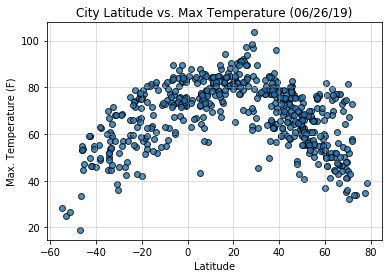

In [17]:
plt.scatter(weather_df["Latitude"], weather_df["Temperature Max"], marker = "o", s = 35, edgecolor = 'k', alpha = 0.8)

plt.title(f"City Latitude vs. Max Temperature ({ue_time_converted})")
plt.xlabel("Latitude")
plt.ylabel("Max. Temperature (F)")
plt.grid(alpha = 0.5)
plt.savefig("output_data/LatitudeVsTemperature.png")
plt.show()


#### Latitude vs. Humidity Plot

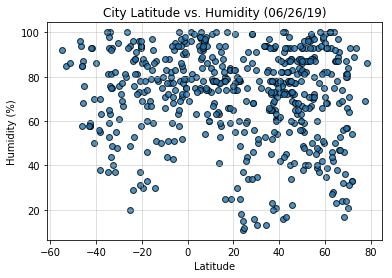

In [18]:
plt.scatter(weather_df["Latitude"], weather_df["Humidity"], marker = "o", s = 35, edgecolor = 'k', alpha = 0.8)

plt.title(f"City Latitude vs. Humidity ({ue_time_converted})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(alpha = 0.5)
plt.savefig("output_data/LatitudeVsHumidity.png")
plt.show()


#### Latitude vs. Cloudiness Plot

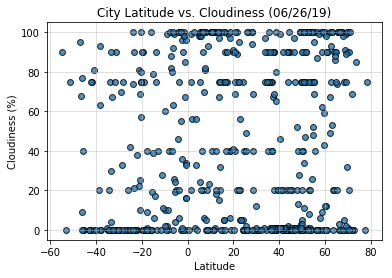

In [19]:
plt.scatter(weather_df["Latitude"], weather_df["Cloudiness"], marker = "o", s = 35, edgecolor = 'k', alpha = 0.8)

plt.title(f"City Latitude vs. Cloudiness ({ue_time_converted})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(alpha = 0.5)
plt.savefig("output_data/LatitudeVsCloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

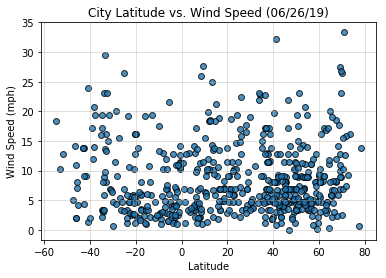

In [20]:
plt.scatter(weather_df["Latitude"], weather_df["Wind Speed"], marker = "o", s = 35, edgecolor = 'k', alpha = 0.8)

plt.title(f"City Latitude vs. Wind Speed ({ue_time_converted})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(alpha = 0.5)
plt.savefig("output_data/LatitudeVsWindSpeed.png")
plt.show()


Observation:

- cities closer to the equator have a higher temperature during this time of the year
- cities at the equator have a high humidity
- there is not enough data to conclude an argument with the latitude relationships with both cloudiness and wind speed
